Saving crime_data.csv to crime_data (1).csv
First few rows of the dataset:
   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

Column names in the dataset:
Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

Missing values in each column:
Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

Non-numeric columns: ['Unnamed: 0']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

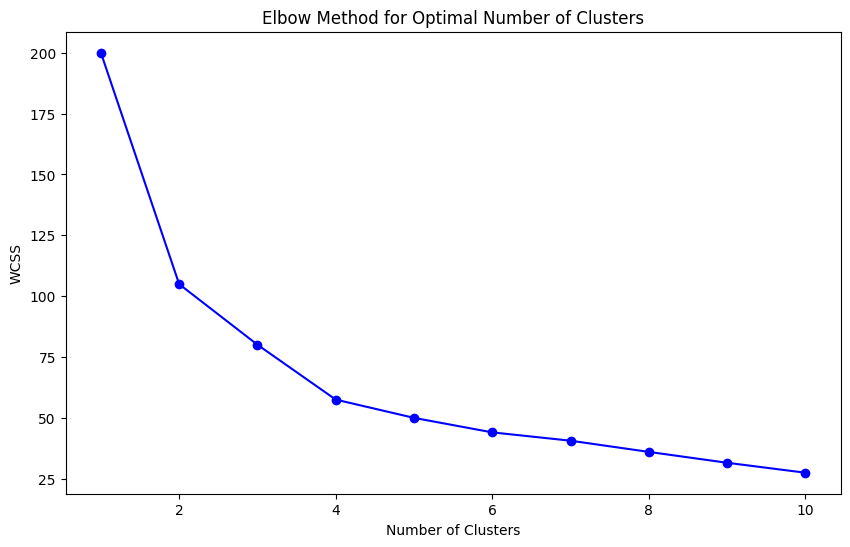

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


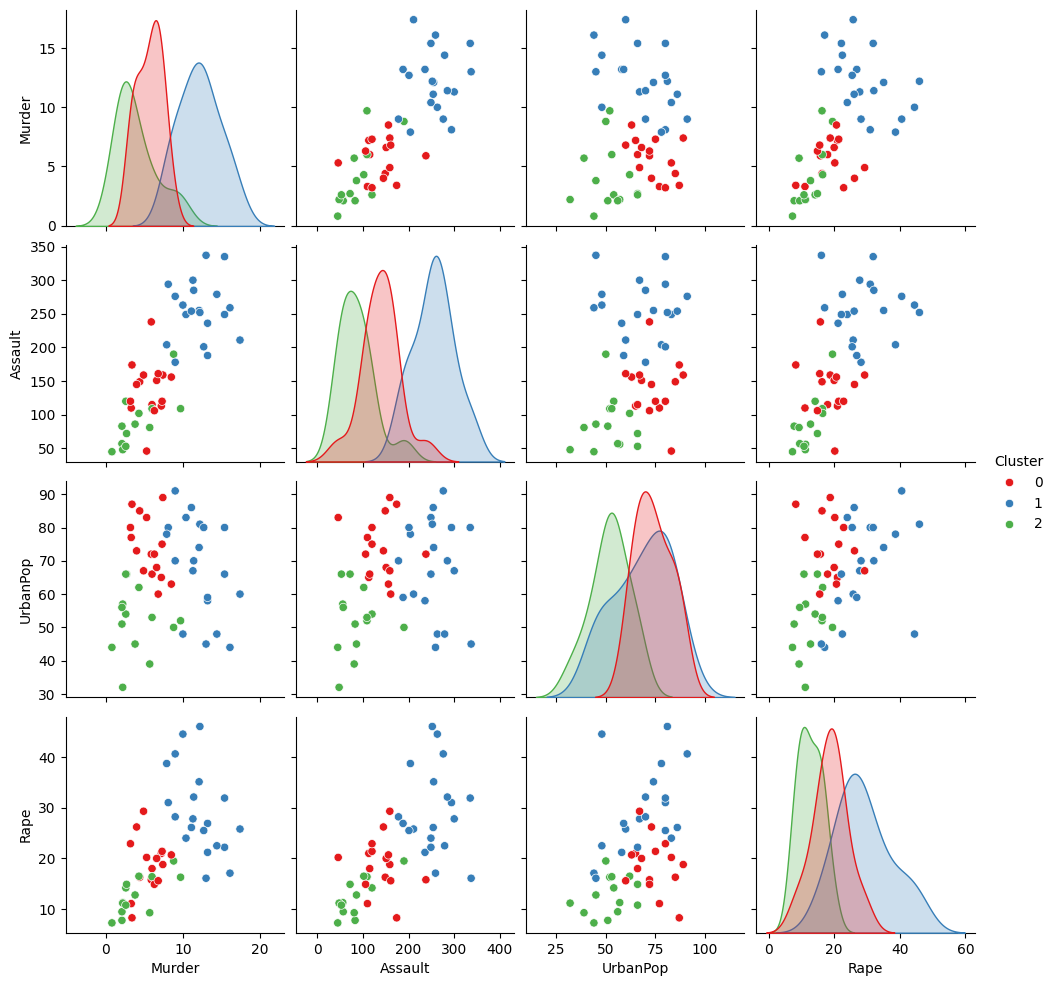

Cluster Centers (original scale):
[[  5.65625    138.875       73.875       18.78125   ]
 [ 12.165      255.25        68.4         29.165     ]
 [  3.97142857  86.5         51.92857143  12.7       ]]
Cluster Value Counts:
Cluster
1    20
0    16
2    14
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Upload the file
uploaded = files.upload()

# Read the uploaded CSV file
df = pd.read_csv(next(iter(uploaded.keys())))

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display column names to understand the structure
print("\nColumn names in the dataset:")
print(df.columns)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Identify and drop non-numeric columns (like 'City' or 'State' names)
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nNon-numeric columns: {non_numeric_columns}")

# Dropping non-numeric columns from the dataset
df_processed = df.drop(columns=non_numeric_columns)

# Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_processed)

# Finding the optimum number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-means with the optimal number of clusters (example: 3)
# Adjust based on the Elbow plot
optimal_clusters = 3  # You may need to change this number based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Inverse transform the cluster centers for better interpretability
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Visualizing the clusters using a pairplot (if dataset is small)
sns.pairplot(df, hue='Cluster', palette='Set1')
plt.show()

# Display the cluster centroids (inverse transformed to original scale)
print("Cluster Centers (original scale):")
print(cluster_centers)

# Show cluster counts
print("Cluster Value Counts:")
print(df['Cluster'].value_counts())

# Saving the clustered data to a new CSV file
df.to_csv('crime_data_clustered.csv', index=False)

# Download the file to your local machine
files.download('crime_data_clustered.csv')